### Trees

A tree data structure has a **root**, **branches**, and **leaves**. The difference between a tree in nature and a tree in computer science is that a tree data structure has its root at the top and its leaves on the bottom.


* Tree: A collection of data whose entries have a hierarchical organization
* Node: An entry in a tree
* Edge: An edge connects two nodes to show that there is a relationship between them.
* Root node: The node at the top
* Terminal or leaf node: A node at the bottom


* Parent: The node immediately above a specified node
* Child: A node immediately below a specified node
* Ancestor: Parent, parent of parent, etc.
* Descendent: Child, child of child, etc.
* Siblings: Nodes sharing a common parent


* Binary tree: A tree in which every node has at most two children
* Path: A path is an ordered list of nodes that are connected by edges
* Level: The level of a node n is the number of edges on the path from the root node to n. By definition, the level of the root node is zero.
* Height: The height of a tree is equal to the maximum level of any node in the tree.
* Subtree: A subtree is a set of nodes and edges comprised of a parent and all the descendants of that parent.

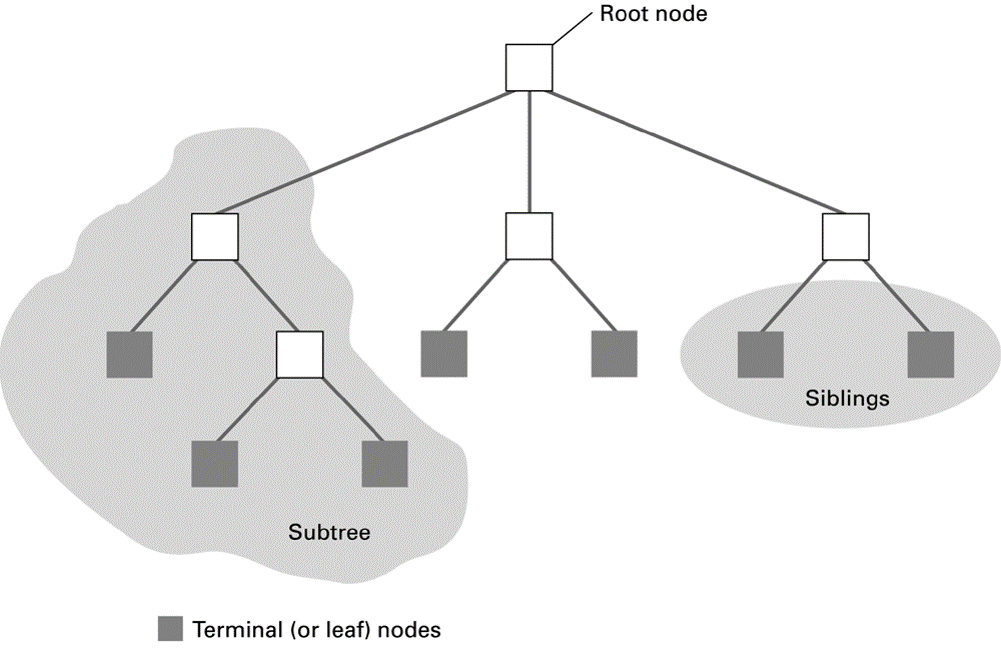

In [1]:
from IPython.display import Image
Image(filename='tree.png', width=600) 

### A tree stored in a list

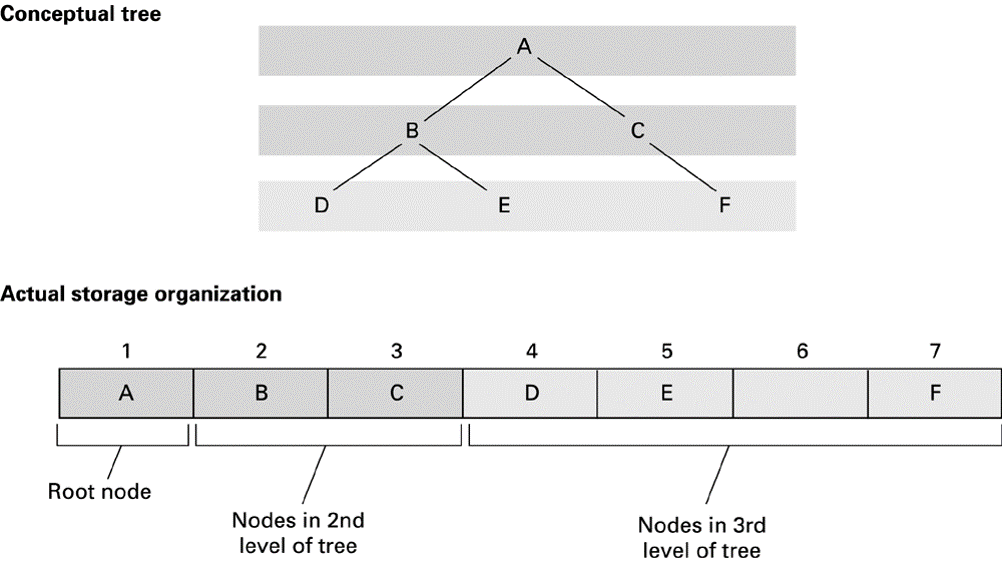

In [2]:
Image(filename='treelist.png', width=600) 

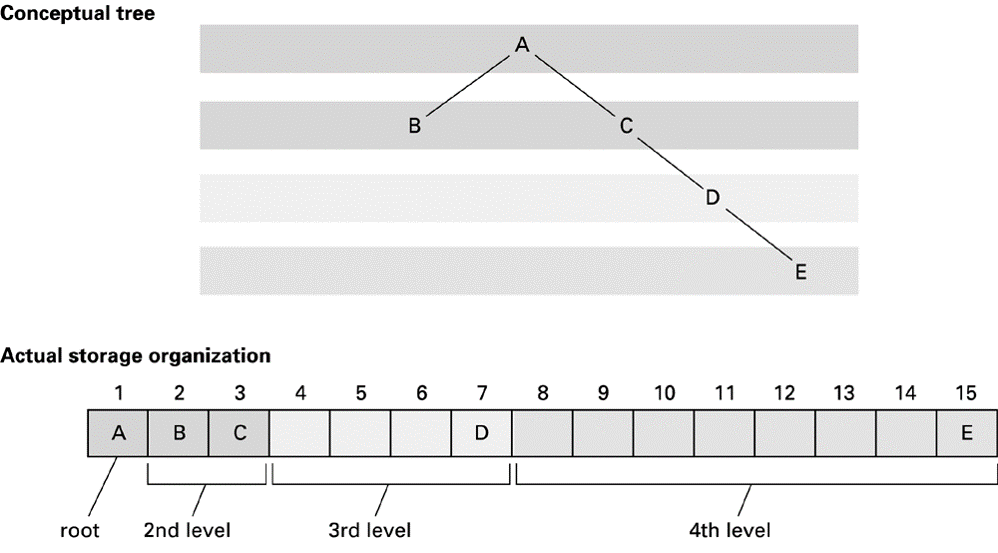

In [3]:
Image(filename='sparsetree.png', width=600) 

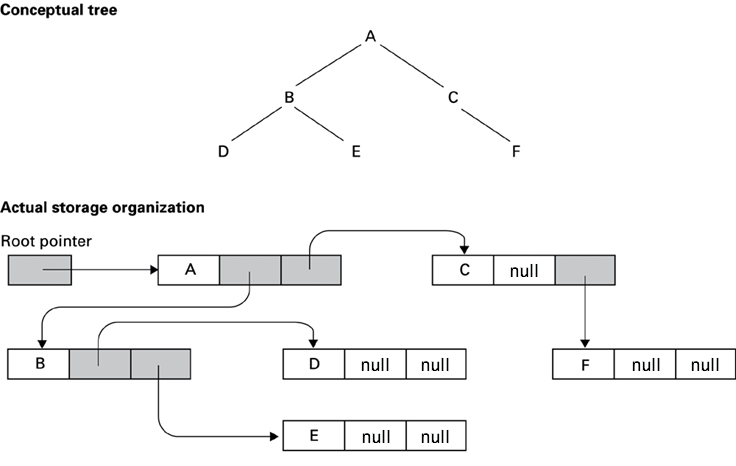

In [4]:
Image(filename='treepointer.png', width=600) 

### List of Lists Representation

A tree three elements in its list: [Value of Root Node, left subtree, right subtree]

In [5]:
myTree = ['A',   #root
          ['B',  #left subtree
           ['D', [], []],
           ['E', [], []] ],
          ['C',  #right subtree
           ['F', [], []],
           []
          ]
         ]

In [6]:
class TreeList:
    
    root = None
    
    def __init__(self, newItem):
        self.root = [newItem, [], []]
    
    # Note that it is just one of the implementation to insert node!
    def insertLeft(self, root, newItem):
        # new item is inserted into a node without left edge
        if root[1] == []:
            root[1] = [newItem, [], []]
        # new item is inserted into a node with left edge
        # we simply put the new item at left edge
        # and attach the oirginal left sub-tree at its left
        else:
            root[1] = [newItem, root[1], []]
            
    def insertRight(self, root, newItem):
        if root[2] == []:
            root[2] = [newItem, [], []]
        else:
            root[2] = [newItem, [], root[2]]
            
    def getRoot(self):
        return self.root

In [7]:
t = TreeList(3)
r = t.getRoot()

t.insertLeft(r,4)
t.insertLeft(r,5)
t.insertRight(r,6)
t.insertRight(r,7)
print(t.root)

[3, [5, [4, [], []], []], [7, [], [6, [], []]]]


### Nodes and References

In [8]:
class BinaryTree:
    def __init__(self, rootItem):
        self.key = rootItem
        self.leftChild = None
        self.rightChild = None
        
    def insertLeft(self, newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
            
    def insertRight(self, newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t
    
    def __str__(self):
        return '[' + str(self.key) + ',' + str(self.leftChild) + ',' + str(self.rightChild) + ']'

In [9]:
t = BinaryTree(3)

t.insertLeft(4)
t.insertLeft(5)
t.insertRight(6)
t.insertRight(7)

print(t)

[3,[5,[4,None,None],None],[7,None,[6,None,None]]]


### Tree Traversals


**preorder**
In a preorder traversal, we visit the root node first, then recursively do a preorder traversal of the left subtree, followed by a recursive preorder traversal of the right subtree.

**inorder**
In an inorder traversal, we recursively do an inorder traversal on the left subtree, visit the root node, and finally do a recursive inorder traversal of the right subtree.

**postorder**
In a postorder traversal, we recursively do a postorder traversal of the left subtree and the right subtree followed by a visit to the root node.

In [10]:
class BinaryTree2:
    
    def __init__(self, rootItem):
        self.key = rootItem
        self.leftChild = None
        self.rightChild = None
        self.order = 'preorder'
        
    def insertLeft(self, newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree2(newNode)
        else:
            t = BinaryTree2(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
            
    def insertRight(self, newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree2(newNode)
        else:
            t = BinaryTree2(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t
    
    def __str__(self):
        
        if self.order == 'preorder':
            return '[' + str(self.key) + ',' + str(self.leftChild) + ',' + str(self.rightChild) + ']'
        elif self.order == 'postorder':
            return '[' + str(self.leftChild) + ',' + str(self.rightChild) + ',' + str(self.key) + ']'
        elif self.order == 'inorder':
            return '[' + str(self.leftChild) + ',' + str(self.key) + ',' + str(self.rightChild) + ']'

In [11]:
t2 = BinaryTree2(3)

t2.insertLeft(4)
t2.insertLeft(5)
t2.insertRight(6)
t2.insertRight(7)

print(t2)

[3,[5,[4,None,None],None],[7,None,[6,None,None]]]


In [12]:
orders = ['preorder', 'postorder', 'inorder']

for o in orders:
    t2.order = o
    print(t2)

[3,[5,[4,None,None],None],[7,None,[6,None,None]]]
[[5,[4,None,None],None],[7,None,[6,None,None]],3]
[[5,[4,None,None],None],3,[7,None,[6,None,None]]]


### Heap and Priority Queue


**Queue** is a first-in first-out data structure. One important variation of a queue is called a **priority queue**. A priority queue acts like a queue in that you dequeue an item by removing it from the front. However, in a priority queue the logical order of items inside a queue is determined by their **priority**. The highest priority items are at the front of the queue and the lowest priority items are at the back. Thus when you enqueue an item on a priority queue, the new item will be move to a right place with respect to its priority.

You can use a list and a sorting funtion to implement a priority queue; however, inserting into a list is $O(n)$ and sorting a list is $O(nlogn)$.

A binary heap will allow us both enqueue and dequeue items in $O(logn)$.

The binary heap has two common variations: the **min heap**, in which the smallest key is always at the front, and the **max heap**, in which the largest key value is always at the front.

The basic operations we will implement for our binary heap are as follows:

* **BinaryHeap()** creates a new, empty, binary heap.
* **insert(k)** adds a new item to the heap.
* **findMin()** returns the item with the minimum key value, leaving item in the heap.
* **delMin()** returns the item with the minimum key value, removing the item from the heap.
* **isEmpty()** returns true if the heap is empty, false otherwise.
* **size()** returns the number of items in the heap.
* **buildHeap(list)** builds a new heap from a list of keys.

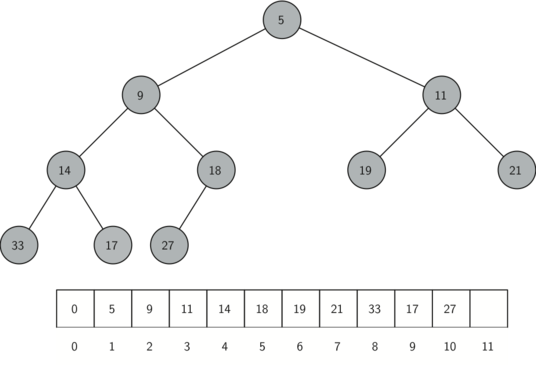

In [13]:
Image(filename='minheap.png', width=600)
# Note that the sub tree of a min heap is still a min heap.
# Note that the order of heap list is not necessarily a sorted list!

In [14]:
# Question: what is the index of your parent?
# Question: what is the index of your left and right child?
# Hint: it is a binary tree!

### The Heap Order Property

The **heap order property** is as follows: In a (min) heap, for every node $x$ with parent $p$, the key in $p$ is smaller than or equal to the key in $x$.

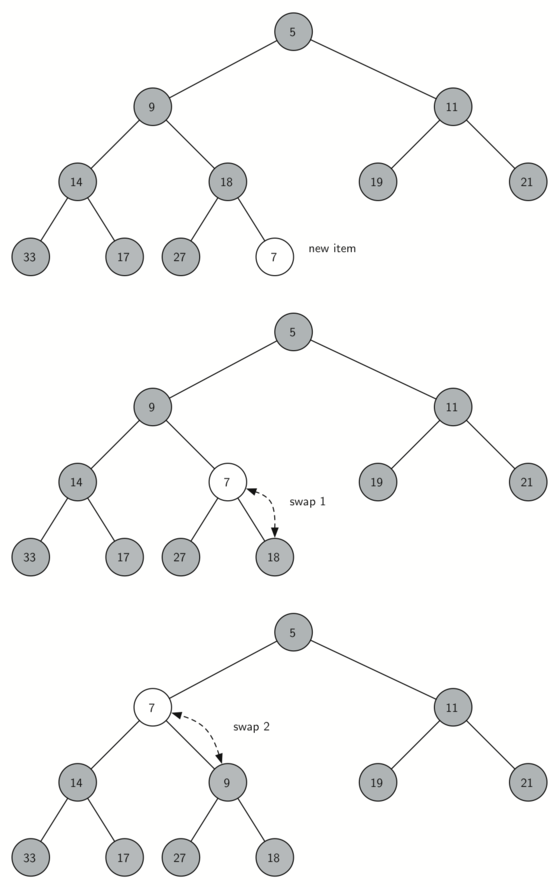

In [15]:
### Add an item to min heap

Image(filename='minheapadd.png', width=600)

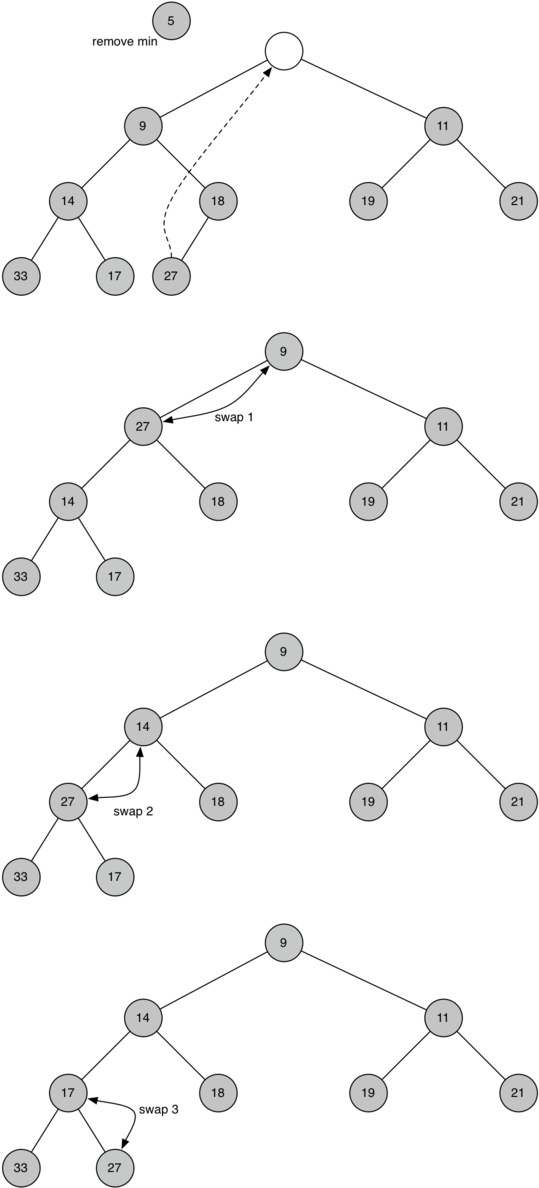

In [16]:
### Remove root from min heap

Image(filename='minheapremove.png', width=600)

In [17]:
class BinMinHeap:
    def __init__(self):
        self.heapList = [0]
        self.currentSize = 0
    
    def percUp(self, i):
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]:
                tmp = self.heapList[i // 2]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = i // 2
            
    def insert(self, k):
        self.heapList.append(k)
        self.currentSize += 1
        self.percUp(self.currentSize)
        
        
    def percDown(self, i):
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc

    def minChild(self, i):
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1
            
    def delMin(self):
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize -= 1
        self.heapList.pop()
        self.percDown(1)
        return retval
    
    def buildHeap(self, li):
        i = len(li) // 2
        self.currentSize = len(li)
        self.heapList = [0] + li[:]
        while (i > 0):
            self.percDown(i)
            i -= 1
            
    def isEmpty(self):
        return True if self.currentSize == 0 else False

In [18]:
h = BinMinHeap()

items = [5, 9, 11, 14, 18, 19, 21, 33, 17, 27]
for i in items:
    h.insert(i)

In [19]:
while not h.isEmpty():
    print(h.delMin())

5
9
11
14
17
18
19
21
27
33
